# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)
multi = pd.read_csv(adultDataSet_filename)
multi2 = pd.read_csv(adultDataSet_filename) # I ended up needing a backup
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

Data set: censusData.csv  
Predicting: I will be prediction the race from the cenus data. I will first be predicting whether or not the person is black, then I will use multi class classification. I know the model will be biased but my goal is to minimize it.

Label: "race"            
supervised/unsupervised: Since my data is labled. I choose to be using Random Forest which is a supervised learning algorithm. 

I am predicting a category per say, not a number so this will nto be logistical regression, instead it will be a classification problem. I will first be doing a  binary classification problem, but then I would like to test how well random forest would do predicting with multiclass classification on this data.

Features: I wil be using all the features in the beginning. I will remove features with too much missing data, or that are too complicated to encode. After running the model once, I will drop the features with low importance.  

Why is this important?      
Finding this information could help a company with marketing, it could help researchers identify gaps in housing, relationships, economic status, and various other features from that data that exist between racial groups. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
print(df.describe())
to_encode = list(df.select_dtypes(include=['object']).columns)
print(df[to_encode].nunique())
df['race'].unique()
df['marital-status'].unique()
df['relationship'].unique()
df['hours-per-week'].unique()
df['race'].value_counts()

#there is a potential risk of our data being skewed with the columns 'capital-gain' and 'capital-loss' as the 
#entire data set for them is 0 save for one or 2 values that are very high (outliers). I think I will keep them in for now 
#and if they affect the data too much later I will adjust them accordingly.

#there are 27k values for white and 3k values for black. I will keep this in mind and see how the model performs. 
#later when I get the results I will look at the misclassified values and see what they are and what potential harms there may be.

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32399.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.589216  1.897784e+05      10.080679    615.907773     87.303830   
std       13.647862  1.055500e+05       2.572720   2420.191974    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  14084.000000   4356.000000   

       hours-per-week  
count    32236.000000  
mean        40.450428  
std         12.353748  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
workclass          8
education         16
marital-status     7


White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Inuit       311
Other                   271
Name: race, dtype: int64

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data?
  
       Yes the new features will be: age, fnlwgt, education, education-num, marital-status, relationship, race, sex_selfID, capital-gain, capital-loss, income_binary                
                   
* Explain different data preparation techniques that you will use to prepare your data for modeling.

        I will use one-hot encoding to make the columns I think I need suitable for the model. One-hot encoding works by making a new column for each value in a feature, but instead using 0 and 1 to represent when that value appears in the original column. The columns will be converted from multiclass to binary, since the model cannot handle non-numbers.          
                
* What is your model (or models)?

      I will be using 2 random forest models. One will be binary and the other will be multiclass at the end. I plan to re run the data trying to predict all of the races instead of just one.          
                   
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data.

      I wil begin my setting all the data for the binary Random Forest model. Then I will train and test the model using a cross validation. I will adjust the hyperparameters using the cross validation until I have about 85-90% accuray. I think if the accuracy is too high it will be overfit to the data. At this point, I will try to find a data set that I can test the model on. If I cannot find one, I will move straight into the multi class Random Forest model.

                      As I work on this project, I come up with more ideas, I will update them here then write a summary at the end of what actually happened. So far I have added: k-fold cross validation (5), and a grid search to help with the hyperparameter tuning. I used 2 separate sets of hyperparameter grids. The first took too long, so I broke it down using only certain values. Once I got the accuracy I looked at the feature importance and picked the smallest few features and dropped them. I made a new instance of the model with the changed data. Now I will start the multiclass classification.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.utils import resample

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

<b> Below are all the data manipultaions</b>

so far i know that there are 32561 lines, i need to drop some columns. 

<b>What I am planning on doing for the data:</b>       
'workclass' - missing 1843 values; dropping it          
 'education' - one-hot encoding        
 'marital-status' - one-hot encoding       
 'occupation' - missing 1843 values; dropping it
 'relationship' - one-hot encoding       
 'race' - one-hot encoding     
 'sex_selfID' - binary?      
 'hours-per-week' - missing 1843 values; dropping it
 'native-country' - missing 583 values; dropping it      
 'income_binary' - one-hot encoding 
 'age' - had some missing values, but I replaced them with the mean. If the importance is low enough later I will just drop the column

In [5]:
df.dtypes

df.drop(columns = 'workclass', inplace = True)
df.drop(columns = 'occupation', inplace = True)
df.drop(columns = 'hours-per-week', inplace = True)
df.drop(columns = 'native-country', inplace = True)
df['age'].fillna(df['age'].mean(), inplace=True)

df.head()


multi.drop(columns = 'workclass', inplace = True)
multi.drop(columns = 'occupation', inplace = True)
multi.drop(columns = 'hours-per-week', inplace = True)
multi.drop(columns = 'native-country', inplace = True)
df['age'].fillna(df['age'].mean(), inplace=True)

<b> here is a view of the data again to confirm the drops worked </b>

In [6]:
to_encode = list(df.select_dtypes(include=['object']).columns)
print(df[to_encode].nunique())

print(df.isnull().sum())

education         16
marital-status     7
relationship       6
race               5
sex_selfID         2
income_binary      2
dtype: int64
age               0
fnlwgt            0
education         0
education-num     0
marital-status    0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
income_binary     0
dtype: int64


<b> We need to fix income_binary to be actual binary and sex_selfid too, and one-hot encode the other columns like, education, marital-status, and relationship. 

I have 2 df to use for when I have a multiclass and binary model</b>

In [7]:
#change 'income_binary' to 'income_fixed' by setting <=50K to 0 and <50K to 1
df['income_fixed'] = df['income_binary'].apply(lambda x: 0 if x == '<=50K' else 1)
df.drop(columns = 'income_binary', inplace = True)

#change 'sex_selfID' to 'gender' by setting 'Female' to 0 and all else to 1
df['gender'] = df['sex_selfID'].apply(lambda x: 1 if x == 'Female' else 0)
df.drop(columns = 'sex_selfID', inplace = True)

#one-hot encode relationship
relationship = list(df['relationship'].value_counts().head(10).index)
for value in relationship:
    df['relationship_'+ value] = np.where(df['relationship']==value,1,0)
df.drop(columns = 'relationship', inplace=True)

#one-hot encode marital-status
maritalstatus = list(df['marital-status'].value_counts().head(10).index)
for value in maritalstatus:
    df['marital-status_'+ value] = np.where(df['marital-status']==value,1,0)
df.drop(columns = 'marital-status', inplace=True)

#one-hot encode education
education = list(df['education'].value_counts().head(10).index)
for value in education:
    df['education_'+ value] = np.where(df['education']==value,1,0)
df.drop(columns = 'education', inplace=True)

#inspect the columns to make sure the one-hot encoding worked
to_encode = list(df.select_dtypes(include=['object']).columns)
print(df[to_encode].nunique())

df.columns





multi['income_fixed'] = multi['income_binary'].apply(lambda x: 0 if x == '<=50K' else 1)
multi.drop(columns = 'income_binary', inplace = True)

#change 'sex_selfID' to 'gender' by setting 'Female' to 0 and all else to 1
multi['gender'] = multi['sex_selfID'].apply(lambda x: 1 if x == 'Female' else 0)
multi.drop(columns = 'sex_selfID', inplace = True)

#one-hot encode relationship
relationship = list(multi['relationship'].value_counts().head(10).index)
for value in relationship:
    multi['relationship_'+ value] = np.where(multi['relationship']==value,1,0)
multi.drop(columns = 'relationship', inplace=True)

#one-hot encode marital-status
maritalstatus = list(multi['marital-status'].value_counts().head(10).index)
for value in maritalstatus:
    multi['marital-status_'+ value] = np.where(multi['marital-status']==value,1,0)
multi.drop(columns = 'marital-status', inplace=True)

#one-hot encode education
education = list(multi['education'].value_counts().head(10).index)
for value in education:
    multi['education_'+ value] = np.where(multi['education']==value,1,0)
multi.drop(columns = 'education', inplace=True)

race    5
dtype: int64


<b> Next we need to prepare the label </b>

For this label we will convert the race column to binary. 1 will be 'Black' and 0 will be all the other races. 

In [8]:
df['race_binary'] = df['race'].apply(lambda x: 1 if x == 'Black' else 0)
df.drop(columns = 'race', inplace=True)

In [9]:
df['race_binary'].value_counts()

0    29437
1     3124
Name: race_binary, dtype: int64

<b> Now the data is ready!! </b>

<b> My chosen model is Random Forest. I will begin by doing a binary classification using the race column as my label. </b>

In [10]:
#set the label
y = df['race_binary']
X = df.drop(columns = 'race_binary', axis = 1)

In [11]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

<b>Now that we have our data and it's set up in its train and test sets.  </b>

<b> We will run the Random Forest model on it and evaluate the results. </b>

In [12]:
# create the model
model = RandomForestClassifier(random_state=42)

#fit the model
model.fit(X_train, y_train)

#predict on the model
predictions = model.predict(X_test)

#print predictions
print(predictions)

#print accuracy
score = accuracy_score(y_test, predictions)
print(score)

cm = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{cm}')

tn, fp, fn, tp = cm.ravel()

# Print the results
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')


[0 0 0 ... 0 0 0]
0.8948715323984031
Confusion Matrix:
[[8652  222]
 [ 805   90]]
True Positives (TP): 90
True Negatives (TN): 8652
False Positives (FP): 222
False Negatives (FN): 805


This means that for 22 (FP) values the model predicted someone as black when they were not, and for 805 (FN) they predicted them as non black when they were indeed black.

<b> These results are ok. I want to see what happens when I use a hyperparameter optimizer. Before we run the model we will set up the hyperparameter tuning. </b>

In [13]:
orig_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# the original one is taking too long, so I compressed it:

param_grid = { 
    #this one got these results:Best hyperparameters:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
    #Best cross-validation accuracy:  0.9055004666531612
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'bootstrap': [True, False]
}

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV

<b> resplit the data

In [15]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.3, random_state = 45)

# create the model
model2 = RandomForestClassifier(random_state=45)

# Initialize the GridSearch and uses 5-fold cross-validation
grid_search = GridSearchCV(estimator = model2, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)

# I found that using n_jobs = -1, will use more of my computer's cores and perform actions in parallel to speed up the process!!

# Fit the GridSearch
grid_search.fit(X_tr, y_tr)

#get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

#get best cross-val accuracy
best_acc = grid_search.best_score_
print("Best cross-validation accuracy: ", best_acc)

#train on the new parameters
best_model = grid_search.best_estimator_
best_model.fit(X_tr, y_tr)

predict = best_model.predict(X_te)

cm = confusion_matrix(y_te, predict )
print(f'Confusion Matrix:\n{cm}')

tn, fp, fn, tp = cm.ravel()

# Print the results
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

score = accuracy_score(y_te, predict)
print(score)

Best hyperparameters:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation accuracy:  0.9068971192480897
Confusion Matrix:
[[8768   17]
 [ 956   28]]
True Positives (TP): 28
True Negatives (TN): 8768
False Positives (FP): 17
False Negatives (FN): 956
0.9003992220288668


This means that for 17 (FP) values the model predicted someone as black when they were not, and for 956 (FN) they predicted them as non black when they were indeed black. Interestingly the FP decreasedby

These results are better in accuracy but pose the same issue of high false negatives. Let's try dropping the classes we were suspicious of in the beginning and adjusting the model.

First I will inspect the capital gain and loss

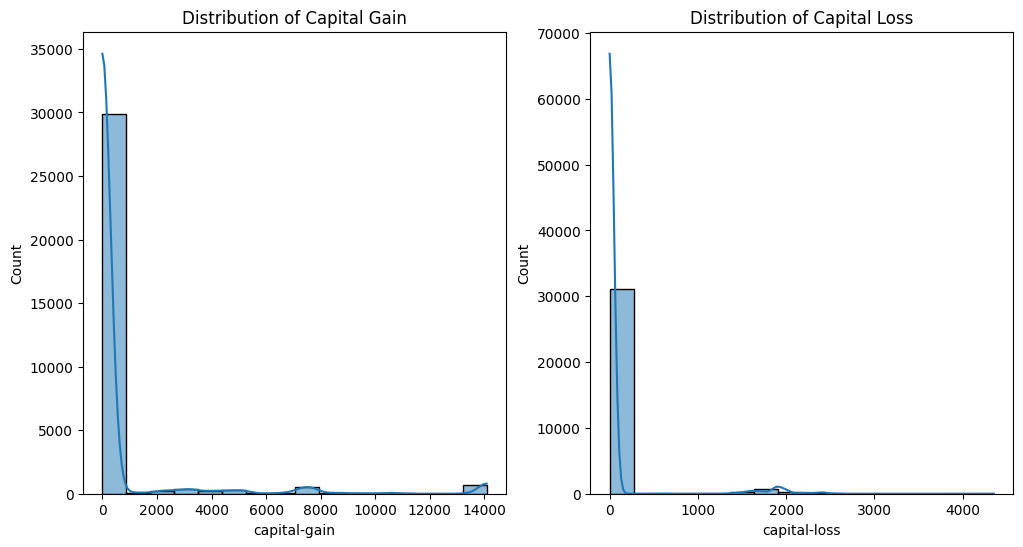

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['capital-gain'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Capital Gain')

sns.histplot(df['capital-loss'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Capital Loss')

plt.show()

We see that the hypothesis is confirmed. There is a majority of 0s in the set and a few outliers. I want to use a log tranformation beause, it compressed the larger values and helps to normalize the distribution. 

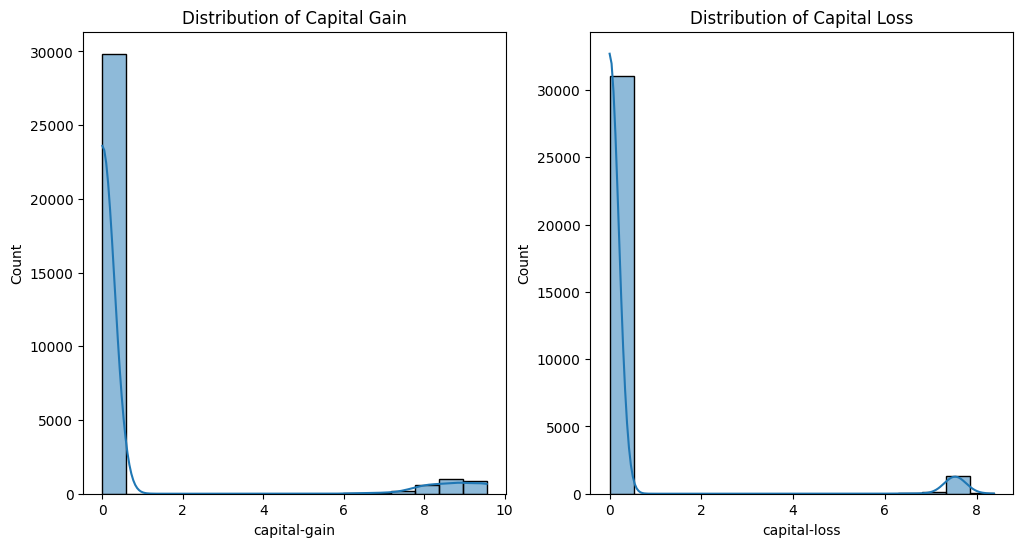

In [17]:
df['capital-gain'] = df['capital-gain'].apply(lambda x: np.log1p(x))
df['capital-loss'] = df['capital-loss'].apply(lambda x: np.log1p(x))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['capital-gain'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Capital Gain')

sns.histplot(df['capital-loss'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Capital Loss')

plt.show()

<b> Now that we have the adjusted data lets run it through the code again with the gid search

In [18]:
adjy = df['race_binary']
adjX = df.drop(columns = 'race_binary', axis = 1)

tr, te, _tr, _te = train_test_split(adjX, adjy, test_size = 0.3, random_state = 45)

# create the model
model5 = RandomForestClassifier(random_state=45)

# Initialize the GridSearch and uses 5-fold cross-validation
grid_search = GridSearchCV(estimator = model5, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)

# I found that using n_jobs = -1, will use more of my computer's cores and perform actions in parallel to speed up the process!!

# Fit the GridSearch
grid_search.fit(tr, _tr)

#get the best hyperparameters
best_params2 = grid_search.best_params_
print("Best hyperparameters: ", best_params2)

#get best cross-val accuracy
best_acc2 = grid_search.best_score_
print("Best cross-validation accuracy: ", best_acc2)

#train on the new parameters
best_model2 = grid_search.best_estimator_
best_model2.fit(tr, _tr)

predict3 = best_model.predict(te)

cm7 = confusion_matrix(_te, predict3)
print(f'Confusion Matrix:\n{cm7}')

tn, fp, fn, tp = cm7.ravel()

# Print the results
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

score_again = accuracy_score(_te, predict3)
print(score_again)

Best hyperparameters:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation accuracy:  0.9068971192480897
Confusion Matrix:
[[8768   17]
 [ 954   30]]
True Positives (TP): 30
True Negatives (TN): 8768
False Positives (FP): 17
False Negatives (FN): 954
0.9006039512744396


<b> Ok we have a minor improvement of 2 False Negatives becoming True Positices!!! <b>

Next I will try undersampling the majority data to get a more even distribution.

but first we will separate the classes and make sure that works

In [19]:
multi_majority = multi[multi['race'] == 'White']
multi_minority = multi[multi['race'] != 'White']
multi_majority.shape

(27816, 31)

In [20]:
#undersample the majority class to match the minority class size
multi_majority_undersampled = resample(multi_majority, 
                                    replace=False, 
                                    n_samples=multi_minority.shape[0], 
                                    random_state=45)

#combine the classes
multi_undersampled = pd.concat([multi_majority_undersampled, multi_minority])

#shuffle them up
multi_undersampled = multi_undersampled.sample(frac=1).reset_index(drop=True)

#training and evaluation as normal
X = multi_undersampled.drop('race', axis=1)
y = multi_undersampled['race']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

model = RandomForestClassifier(random_state=45, class_weight='balanced')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm3}')
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {score}')


Best hyperparameters:  {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
[[ 13   4  15   3  63]
 [  6  53  75   0 166]
 [  9  34 491   8 406]
 [  2   4  25   2  48]
 [ 19  80 363   4 954]]
                    precision    recall  f1-score   support

 Amer-Indian-Inuit       0.27      0.13      0.18        98
Asian-Pac-Islander       0.30      0.18      0.22       300
             Black       0.51      0.52      0.51       948
             Other       0.12      0.02      0.04        81
             White       0.58      0.67      0.62      1420

          accuracy                           0.53      2847
         macro avg       0.36      0.30      0.32      2847
      weighted avg       0.50      0.53      0.51      2847

Accuracy: 0.5314365999297506


That decreased the accuracy by a lot. I don't know enough about how this works to continue it further so lets continue with the 90% accuracy form before. Now that we have a pretty good accuracy, I want to see the feature importance. 

In [21]:
importances = best_model2.feature_importances_
feature_names = adjX.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

Now plot it:

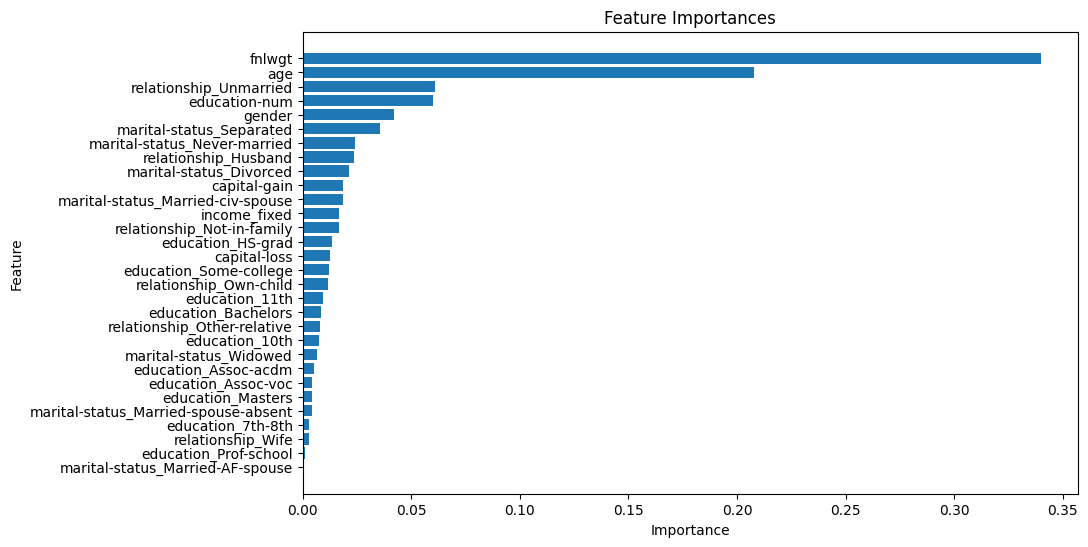

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

<b> The features, 'marital-status_Married-AF-spouse', 'education Prof-school', 'relationship_Wife', 'education_Masters' have a very low feature weight and I will drop them. The most important feature is fnlwgt which is the final weight, which is the number of people the cenus believes that statistic represents. It is typical for this feature to capture demographic information. </b>

In [23]:
#droppping the features with very low feature importance
df.drop(columns = 'marital-status_Married-AF-spouse', inplace=True)
df.drop(columns = 'education_Prof-school', inplace=True)
df.drop(columns = 'relationship_Wife', inplace=True)
df.drop(columns = 'education_Masters', inplace=True)
df.drop(columns = 'education_7th-8th', inplace=True)

<b> Creating another Random Forest instance with the best features </b>

In [24]:
checky = df['race_binary']
checkX = df.drop(columns = 'race_binary', axis = 1)

tr, te, _tr, _te = train_test_split(checkX, checky, test_size = 0.3, random_state = 45)

# create the model
model = RandomForestClassifier(bootstrap = True, max_depth = 20, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 100, random_state=42)

#fit the model
model.fit(tr, _tr)

#predict on the model
predict3 = model.predict(te)

#print accuracy
score_again = accuracy_score(_te, predict3)
print(score_again)

cm7 = confusion_matrix(_te, predict3)
print(f'Confusion Matrix:\n{cm7}')

tn, fp, fn, tp = cm7.ravel()

# Print the results
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

0.9012181390111578
Confusion Matrix:
[[8770   15]
 [ 950   34]]
True Positives (TP): 34
True Negatives (TN): 8770
False Positives (FP): 15
False Negatives (FN): 950


<b> After dropping the useless features, the accuracy increased about .001 percent. Let's try only keeping the top 20 features. </b>

In [25]:
#drop features that aren't the top 20
df.drop(columns = 'education_10th', inplace=True)
df.drop(columns = 'marital-status_Widowed', inplace=True)
df.drop(columns = 'education_Assoc-acdm', inplace=True)
df.drop(columns = 'education_Assoc-voc', inplace=True)
df.drop(columns = 'marital-status_Married-spouse-absent', inplace=True)

<b> now we will rerun the model

In [26]:
checky = df['race_binary']
checkX = df.drop(columns = 'race_binary', axis = 1)

tr, te, _tr, _te = train_test_split(checkX, checky, test_size = 0.3, random_state = 45)

# create the model
model = RandomForestClassifier(bootstrap = True, max_depth = 20, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 100, random_state=42)

#fit the model
model.fit(tr, _tr)

#predict on the model
predict3 = model.predict(te)

#print accuracy
score_again = accuracy_score(_te, predict3)
print(score_again)

0.901013409765585


<b> This is probably the best the accuracy can get. Now that we have a binary model that works pretty well I want to try multiclass.

I have to start by doing all the same data manipulations to a new version of the dataset:

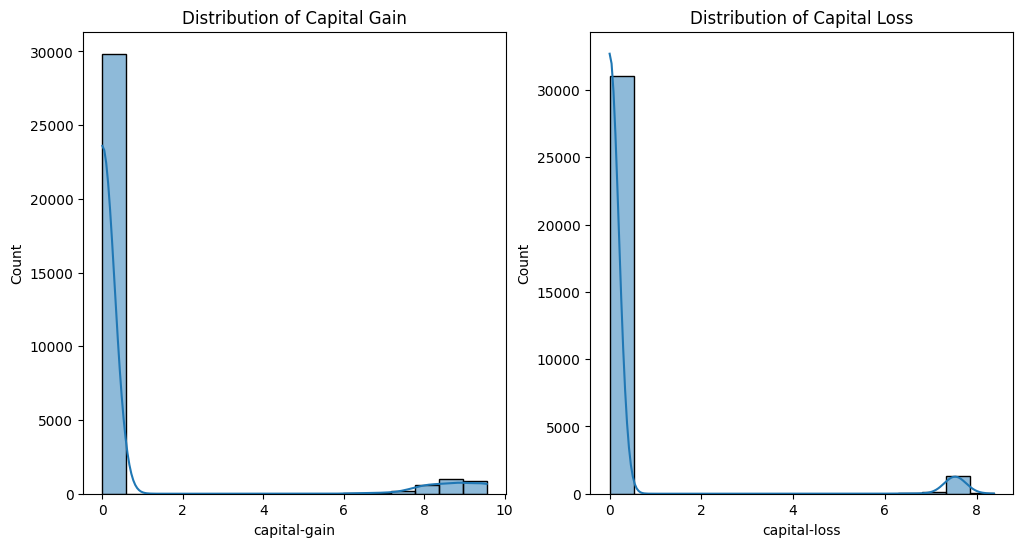

In [27]:
multi2.drop(columns = 'workclass', inplace = True)
multi2.drop(columns = 'occupation', inplace = True)
multi2.drop(columns = 'hours-per-week', inplace = True)
multi2.drop(columns = 'native-country', inplace = True)
multi2['age'].fillna(multi2['age'].mean(), inplace=True)

#change 'income_binary' to 'income_fixed' by setting <=50K to 0 and <50K to 1
multi2['income_fixed'] = multi2['income_binary'].apply(lambda x: 0 if x == '<=50K' else 1)
multi2.drop(columns = 'income_binary', inplace = True)

#change 'sex_selfID' to 'gender' by setting 'Female' to 0 and all else to 1
multi2['gender'] = multi2['sex_selfID'].apply(lambda x: 1 if x == 'Female' else 0)
multi2.drop(columns = 'sex_selfID', inplace = True)

#one-hot encode relationship
relationship = list(multi2['relationship'].value_counts().head(10).index)
for value in relationship:
    multi2['relationship_'+ value] = np.where(multi2['relationship']==value,1,0)
multi2.drop(columns = 'relationship', inplace=True)

#one-hot encode marital-status
maritalstatus = list(multi2['marital-status'].value_counts().head(10).index)
for value in maritalstatus:
    multi2['marital-status_'+ value] = np.where(multi2['marital-status']==value,1,0)
multi2.drop(columns = 'marital-status', inplace=True)

#one-hot encode education
education = list(multi2['education'].value_counts().head(10).index)
for value in education:
    multi2['education_'+ value] = np.where(multi2['education']==value,1,0)
multi2.drop(columns = 'education', inplace=True)


#log transformation on the columns with outliers
multi2['capital-gain'] = multi2['capital-gain'].apply(lambda x: np.log1p(x))
multi2['capital-loss'] = multi2['capital-loss'].apply(lambda x: np.log1p(x))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['capital-gain'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Capital Gain')

sns.histplot(df['capital-loss'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Capital Loss')

plt.show()

#droppping the features with very low feature importance
multi.drop(columns = 'education_10th', inplace=True)
multi.drop(columns = 'marital-status_Widowed', inplace=True)
multi.drop(columns = 'education_Assoc-acdm', inplace=True)
multi.drop(columns = 'education_Assoc-voc', inplace=True)
multi.drop(columns = 'marital-status_Married-AF-spouse', inplace=True)
multi.drop(columns = 'education_Prof-school', inplace=True)
multi.drop(columns = 'relationship_Wife', inplace=True)
multi.drop(columns = 'education_Masters', inplace=True)
multi.drop(columns = 'education_7th-8th', inplace=True)
multi.drop(columns = 'marital-status_Married-spouse-absent', inplace=True)

<b> I have to make separate manipultaions to the race column. This time encoding each label into a number. </b>

In [28]:
#encode the data

#load the encoder
le = LabelEncoder()

# Fit and transform the column
multi2['race_encoded'] = le.fit_transform(multi2['race'])

# Get the mapping of classes to labels
class_mapping = {index: label for index, label in enumerate(le.classes_)}
print("Class mapping: ", class_mapping)

multi2.drop(columns = 'race', inplace=True)

Class mapping:  {0: 'Amer-Indian-Inuit', 1: 'Asian-Pac-Islander', 2: 'Black', 3: 'Other', 4: 'White'}


In [29]:
#make sure it worked
multi2['race_encoded'].unique()
multi2.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'income_fixed', 'gender', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'relationship_Other-relative', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'marital-status_Divorced',
       'marital-status_Separated', 'marital-status_Widowed',
       'marital-status_Married-spouse-absent',
       'marital-status_Married-AF-spouse', 'education_HS-grad',
       'education_Some-college', 'education_Bachelors', 'education_Masters',
       'education_Assoc-voc', 'education_11th', 'education_Assoc-acdm',
       'education_10th', 'education_7th-8th', 'education_Prof-school',
       'race_encoded'],
      dtype='object')

<b> Then make the train and test sets</b>

In [30]:
#set the label
w = multi2['race_encoded']
Z = multi2.drop(columns = 'race_encoded', axis = 1)

In [31]:
#split the data
Z_train, Z_test, w_train, w_test = train_test_split(Z, w, test_size = 0.3, random_state = 55)

In [32]:
# create the model
model9 = RandomForestClassifier(random_state=50)

# Initialize the GridSearch and uses 5-fold cross-validation
grid_search = GridSearchCV(estimator = model9, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)

# Fit the GridSearch
grid_search.fit(Z_train, w_train)

#get the best hyperparameters
best_params9 = grid_search.best_params_
print("Best hyperparameters: ", best_params9)

#get best cross-val accuracy
best_acc9 = grid_search.best_score_
print("Best cross-validation accuracy: ", best_acc9)

#train on the new parameters
best_model9 = grid_search.best_estimator_
best_model9.fit(Z, w)

w_pred = best_model9.predict(Z_test)
cm9 = confusion_matrix(w_test, w_pred)
print(f'Confusion Matrix:\n{cm9}')
print(classification_report(w_test, w_pred))

Best hyperparameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation accuracy:  0.8548613801341507
Confusion Matrix:
[[   0    0    1    0   98]
 [   0    0    1    0  293]
 [   0    0   68    0  864]
 [   0    0    0    0   80]
 [   0    0   14    0 8350]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.00      0.00      0.00       294
           2       0.81      0.07      0.13       932
           3       0.00      0.00      0.00        80
           4       0.86      1.00      0.93      8364

    accuracy                           0.86      9769
   macro avg       0.33      0.21      0.21      9769
weighted avg       0.82      0.86      0.80      9769



/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

<b> We will redo the feature importances and the plot for it </b>

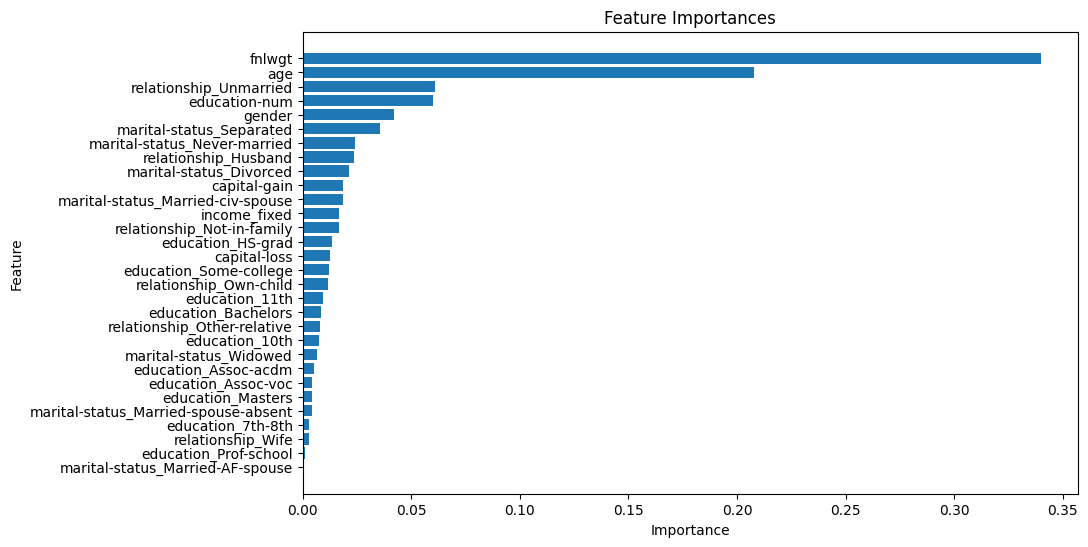

In [33]:
importances = best_model2.feature_importances_
feature_names = Z.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

Conclusion:              
            
In this project, I developed a binary classification Random Forest (RF) algorithm to classify individuals based on their race. Initially, I examined the confusion matrix to understand where misclassifications were occurring. Observing a significant number of false negatives, I decided to optimize the model further by tuning its hyperparameters using a grid search. This process helped me identify the best set of parameters to improve model performance.

Following this, I revisited the distribution of two features I had suspected earlier of contributing to misclassifications. Although I constructed another model after optimizing these features, the improvement was minimal. One of the key challenges was the high rate of false negatives, where the model incorrectly classified people as black when they were not. Attempts to handle this through undersampling made the model's performance worse, highlighting the issues with addressing the distribution issues. 

To enhance the model, I analyzed feature importance and retained only the top 20 features. This refined model achieved a 90% accuracy rate. Encouraged by this, I explored whether a multi-class classification approach would yield better results. I created a second data frame, ensuring it matched the first one, and encoded the labels to prepare for the new algorithm. However, the multi-class model did not achieve the same level of accuracy as the binary model.

The next steps involve obtaining or adjusting the dataset to balance the class distributions. My model uses a random split which causes the underrepresented classes to be insufficiently sampled in the training set. This imbalance diminishes the model's ability to predict these classes accurately. This project has illuminated the broader issue of algorithmic bias, where models can inadvertently learn and transmit stereotypes present in the data.

Overall, this project provided valuable insights into the challenges of racial classification in machine learning. Addressing these challenges requires careful consideration of data distribution and continuous efforts to mitigate bias in algorithmic predictions.